c:\Users\antos\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\antos\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


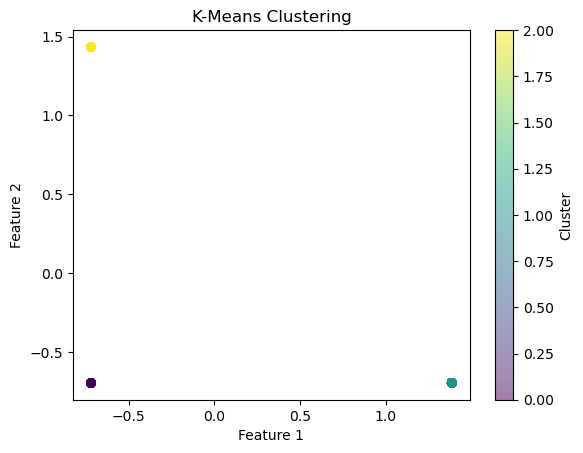

   Risk Appetite_Aggressive  Risk Appetite_Conservative  \
0                         0                           0   
1                       342                           0   
2                         0                         327   

   Risk Appetite_Moderate  
0                     331  
1                       0  
2                       0  


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load encoded data
df_encoded = pd.read_csv(r"C:\Users\antos\OneDrive\Desktop\CAPSTONE\Project 9-14\CUSTOMER DATA FINAL\encoded_data.csv")

# Select relevant features for clustering (including risk appetite columns)
features = df_encoded[['Risk Appetite_Aggressive', 'Risk Appetite_Conservative', 'Risk Appetite_Moderate',
                      'Reaction to Market Volatility_Anxious', 'Reaction to Market Volatility_Calm', 'Reaction to Market Volatility_Panicked',
                      'Investment Horizon_Long-term', 'Investment Horizon_Medium-term', 'Investment Horizon_Short-term',
                      'Level of Investment Experience_Advanced', 'Level of Investment Experience_Beginner', 'Level of Investment Experience_Intermediate',
                      'Previous Investment Experience_No', 'Previous Investment Experience_Yes']]

# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Choose the number of clusters
num_clusters = 3

# Perform K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Visualize the clusters
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.colorbar(label='Cluster')
plt.show()

# Check cluster distributions of risk appetite
cluster_risk_counts = df_encoded.groupby(clusters)[['Risk Appetite_Aggressive', 'Risk Appetite_Conservative', 'Risk Appetite_Moderate']].sum()
print(cluster_risk_counts)